# Importing required libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import plotly.express as px
import pandas as pd
import json
import plotly.graph_objects as go
import pickle

# Calculating the cost in dollar per passanger per miles

In [15]:
df1=pd.read_csv("/home/kamal/Desktop/IEEEBigData/Dataset/Price/Q1_2022_DB1B_MARKET.csv")
df2=pd.read_csv("/home/kamal/Desktop/IEEEBigData/Dataset/Price/Q2_2022_DB1B_MARKET.csv")
df3=pd.read_csv("/home/kamal/Desktop/IEEEBigData/Dataset/Price/Q3_2022_DB1B_MARKET.csv")
df4=pd.read_csv("/home/kamal/Desktop/IEEEBigData/Dataset/Price/Q4_2022_DB1B_MARKET.csv")
df5=pd.read_csv("/home/kamal/Desktop/IEEEBigData/Dataset/Price/Q1_2021_DB1B_MARKET.csv")
df6=pd.read_csv("/home/kamal/Desktop/IEEEBigData/Dataset/Price/Q2_2021_DB1B_MARKET.csv")
df7=pd.read_csv("/home/kamal/Desktop/IEEEBigData/Dataset/Price/Q3_2021_DB1B_MARKET.csv")
df8=pd.read_csv("/home/kamal/Desktop/IEEEBigData/Dataset/Price/Q4_2021_DB1B_MARKET.csv")

# Concatenate the DataFrames vertically
df = pd.concat([df5,df6,df7,df8,df1, df2,df3,df4], axis=0)

In [16]:
selected_columns_df = df[['MARKET_COUPONS', 'YEAR', 'QUARTER','ORIGIN','DEST','AIRPORT_GROUP','PASSENGERS','MARKET_FARE','MARKET_DISTANCE','MARKET_MILES_FLOWN']].copy()
selected_columns_df.loc[:, 'Cost'] = selected_columns_df['MARKET_FARE'] / (selected_columns_df['MARKET_DISTANCE'] * selected_columns_df['PASSENGERS'])

In [17]:
# Selecting the distances in the range of RAM
selected_columns_df = selected_columns_df[(selected_columns_df['MARKET_DISTANCE'] >= 10) & (selected_columns_df['MARKET_DISTANCE'] <= 500)]

In [18]:
# Print all the unique values in the 'MARKET_COUPONS' column
unique_origin_states = selected_columns_df['MARKET_COUPONS'].unique()

In [19]:
df = selected_columns_df[['Cost','MARKET_DISTANCE']]

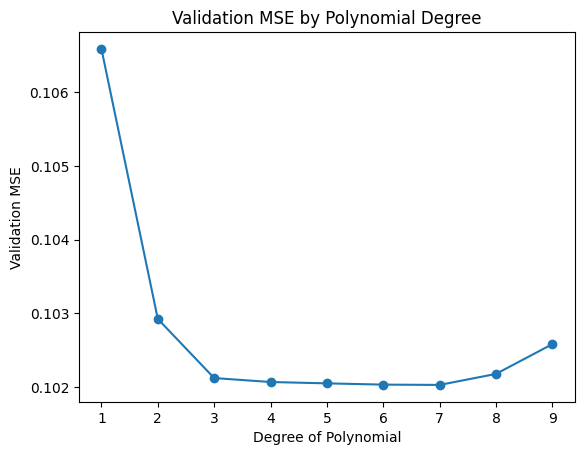

Best polynomial degree: 7


In [21]:
# Filter the DataFrame to include only cost less than $5
df_filtered = df[df['Cost'] < 5]

# Prepare data
X = df_filtered['MARKET_DISTANCE'].values.reshape(-1, 1)
y = df_filtered['Cost'].values

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

# Test different degrees
degrees = range(1, 10)
validation_scores = []
models = []
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = mean_squared_error(y_val, y_pred)
    validation_scores.append(score)
    models.append(model)

# Plot validation scores
plt.plot(degrees, validation_scores, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Validation MSE')
plt.title('Validation MSE by Polynomial Degree')
plt.show()

# Choose the model with the lowest validation MSE
best_degree = degrees[np.argmin(validation_scores)]
best_model = models[np.argmin(validation_scores)]
print("Best polynomial degree:", best_degree)

/home/kamal/Desktop/IEEEBigData/venvBigData/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


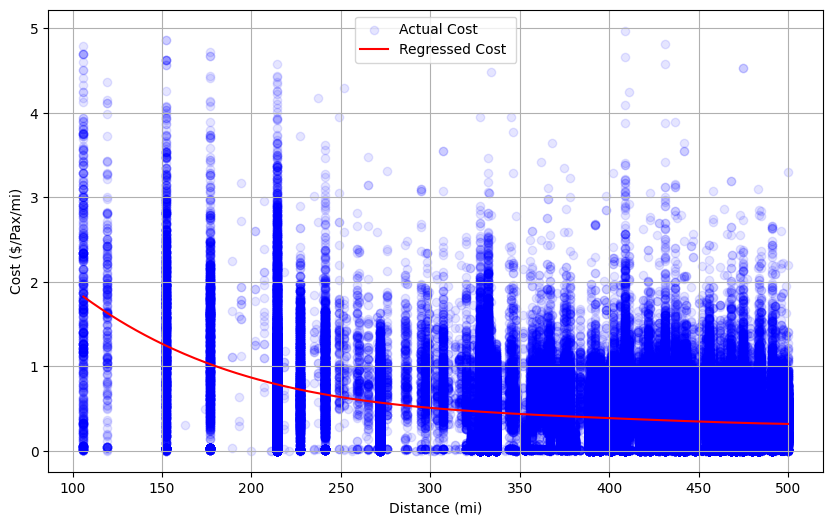

In [22]:
# Filter the DataFrame to include only cost less than $5
filtered_df = df[df['Cost'] < 5]

# Fit a polynomial regression
degree = 4  # Degree can be adjusted based on how well you need the curve to fit though degree 7 is best its not peforming well for distance less than 100, we need from 50 miles
coefficients = np.polyfit(filtered_df['MARKET_DISTANCE'], filtered_df['Cost'], degree)
polynomial = np.poly1d(coefficients)

# Generate predicted y-values using the polynomial for plotting
x_values = np.linspace(min(filtered_df['MARKET_DISTANCE']), max(filtered_df['MARKET_DISTANCE']), 400)
y_values = polynomial(x_values)

# Plotting the scatter plot and the regression curve
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['MARKET_DISTANCE'], filtered_df['Cost'], color='blue', alpha=0.1, label='Actual Cost')
plt.plot(x_values, y_values, color='red', label='Regressed Cost ')
# plt.title('Cost vs. Distance')
plt.xlabel('Distance (mi)')
plt.ylabel('Cost ($/Pax/mi)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Save coefficients to a file
with open('/home/kamal/Desktop/IEEEBigData/SavedModel/polynomial_cost_coefficients.pkl', 'wb') as file:
    pickle.dump(coefficients, file)